### Importing the necessary libraries and packages

In [1]:
from sklearn.datasets import load_breast_cancer # Load the iris dataset
from sklearn.model_selection import train_test_split # splitting the dataset
from sklearn.linear_model import LogisticRegression # classification algorithm
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report, auc, roc_auc_score # metrics
from joblib import dump
import numpy as np # data processing
import pandas as pd # data processing
import matplotlib.pyplot as plt # data plotting

### Importing the csv file as a dataFrame

In [2]:
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df
breast_cancer=load_breast_cancer()
df_breast_cancer = sklearn_to_df(breast_cancer)
df_breast_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Now taking 2 parts from the dataset:
#### X : which contains all the data except the <b>target</b> column<br>y : which contains only the <b>target</b> column 

In [3]:
X=df_breast_cancer.iloc[:,:-1].values
y=df_breast_cancer.iloc[:,-1].values

### Split the X and y dataframes for test and training

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)

# Logistic Regression

In [5]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

In [6]:
lr_con_matrix = confusion_matrix(y_test, lr_pred)
lr_acc = accuracy_score(y_test, lr_pred)
print("Confusion Matrix",'\n', lr_con_matrix,"\n")
print("Accuracy of Logistic Regression : ", lr_acc*100, "\n")
print("Classification Report", '\n', classification_report(y_test, lr_pred))

Confusion Matrix 
 [[22  0]
 [ 2 33]] 

Accuracy of Logistic Regression :  96.49122807017544 

Classification Report 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       1.00      0.94      0.97        35

    accuracy                           0.96        57
   macro avg       0.96      0.97      0.96        57
weighted avg       0.97      0.96      0.97        57



In [7]:
y_score = lr.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
roc_auc = auc(false_positive_rate, true_positive_rate)

### Plotting the ROC curve

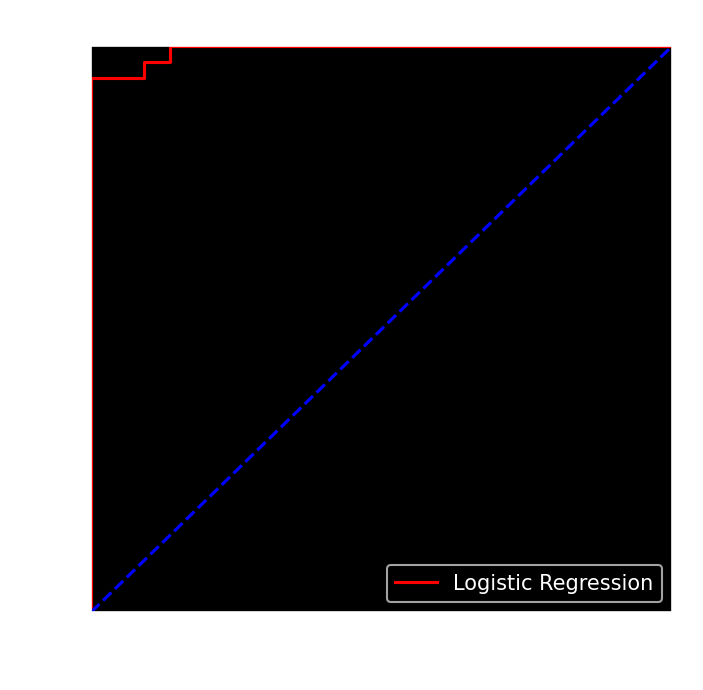

In [8]:
plt.figure(figsize=(5,5),dpi=150)
plt.style.use('dark_background')
plt.plot(false_positive_rate,true_positive_rate, color='red', label = "Logistic Regression")
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('Images/ROC_Curve_Logistic_Regression.png', bbox_inches='tight')

## Computing the AUC of ROC

In [9]:
print("Area Under the Receiver Operating Characteristic Curve :",roc_auc_score(y_test,y_score))

Area Under the Receiver Operating Characteristic Curve : 0.9935064935064934


# Saving the model

In [10]:
dump(lr, 'logisticRegression.joblib')

['logisticRegression.joblib']